<a href="https://colab.research.google.com/github/MirzaBanana/C5026201057/blob/main/Final_Projek_China.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group China Final Project

# Import Libraries

In [ ]:
'''!pip install pycaret
!pip install -U numba'''

'!pip install pycaret\n!pip install -U numba'

In [ ]:
!python -m pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import Library
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier,  RidgeClassifierCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from skopt import gp_minimize
from skopt.space.space import Integer, Real, Categorical
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# Data Collecting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
customer = pd.read_csv("/content/drive/MyDrive/Mockup Datasets/customer.csv")
transaction = pd.read_csv("/content/drive/MyDrive/Mockup Datasets/transactions.csv")
product = pd.read_csv("/content/drive/MyDrive/Mockup Datasets/product.csv",error_bad_lines=False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [ ]:
customer = customer[['customer_id','gender','device_type','device_id','birthdate','home_location','first_join_date']]
customer.sample(3)

,customer_id,gender,device_type,device_id,birthdate,home_location,first_join_date
35824,27408,F,Android,2f1c7e88-e1d7-448e-a49d-d4c487d2e66d,1998-10-03,Jakarta Raya,2020-11-03
6021,20571,F,Android,fb9e35b2-a02d-4a56-bfeb-6c0add3b3903,1990-08-30,Jawa Timur,2021-12-26
76963,1737,M,Android,3f838637-42cc-417b-969c-abc987e0a464,1994-04-15,Kalimantan Barat,2021-11-27


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [ ]:
transaction = transaction[['created_at','customer_id','booking_id','session_id','payment_status','promo_amount','promo_code','total_amount']]
transaction.sample(3)

,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,total_amount
537133,2021-04-04T05:28:45.497080Z,65138,355bf8eb-4b43-4dc2-98c0-e218b58ef219,a733264a-8205-4d05-a25b-31ef825c32c2,Success,0,NaN,465788
360175,2019-07-27T05:22:29.329144Z,96351,41ea8db1-ccc4-4ebb-b40c-371c76b6c7a6,d7e2ee41-a4c3-4bc3-a5d2-b458649251b2,Success,0,NaN,249298
344228,2018-10-29T18:48:30.019905Z,82491,6313d2e4-3fc9-4b4c-a31d-e7cc3bda2340,fa2dcada-38a8-46b2-a6dd-419580ce5712,Success,3879,BUYMORE,216945


In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [ ]:
product.sample(3)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
23085,27476,Women,Apparel,Innerwear,Bra,Black,Winter,2015.0,Casual,Jockey Essence Black Seamless Bra 2003
18882,45281,Women,Accessories,Wallets,Wallets,Red,Summer,2012.0,Casual,Lino Perros Women Red Wallet
14712,31881,Women,Accessories,Stoles,Stoles,Blue,Summer,2012.0,Casual,Fabindia Women Blue Stole


# Data Cleansing

##Missing Value

In [ ]:
customer.isna().sum()

customer_id        0
gender             0
device_type        0
device_id          0
birthdate          0
home_location      0
first_join_date    0
dtype: int64

In [ ]:
transaction.isna().sum()

created_at             0
customer_id            0
booking_id             0
session_id             0
payment_status         0
promo_amount           0
promo_code        526048
total_amount           0
dtype: int64

In [ ]:
transaction['promo_code'].fillna('Without Promo',inplace=True)
transaction.isna().sum()

created_at        0
customer_id       0
booking_id        0
session_id        0
payment_status    0
promo_amount      0
promo_code        0
total_amount      0
dtype: int64

In [ ]:
product.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [ ]:
product['baseColour'].fillna('No Color',inplace=True)
product['season'].fillna('No Season',inplace=True)
product['year'].fillna(0,inplace=True)
product['usage'].fillna('No Usage',inplace=True)
product['productDisplayName'].fillna('No Display Name',inplace=True)
product.isna().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

##Cleaning Data

In [ ]:
#Mengubah tipe data sesuai isinya yaitu tanggal
customer['birthdate'] = pd.to_datetime(customer['birthdate'])
customer['first_join_date'] = pd.to_datetime(customer['first_join_date'])
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      100000 non-null  int64         
 1   gender           100000 non-null  object        
 2   device_type      100000 non-null  object        
 3   device_id        100000 non-null  object        
 4   birthdate        100000 non-null  datetime64[ns]
 5   home_location    100000 non-null  object        
 6   first_join_date  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
#Mengisi data kosong pada tahun dan mengubah tipe data dari object menjadi date time
product['year'].fillna(2012, inplace=True)
product['year'] = pd.to_datetime(product['year']).dt.year
product.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,1970,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,1970,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,1970,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,1970,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,1970,Casual,Puma Men Grey T-shirt


In [ ]:
product['season'] = product['season'].fillna('Summer', limit = 6)
for i in ['Fall', 'Winter', 'Spring']:
  product['season'] = product['season'].fillna(i, limit = 5)

product['season'].value_counts().to_frame()

,season
Summer,21472
Fall,11431
Winter,8517
Spring,2983
No Season,21


In [ ]:
product['baseColour'].value_counts().to_frame()

,baseColour
Black,9728
White,5538
Blue,4918
Brown,3494
Grey,2741
Red,2455
Green,2115
Pink,1860
Navy Blue,1789
Purple,1640


In [ ]:
product['productDisplayName'] = product['productDisplayName'].fillna('Not Displayed')
for name in product[product['baseColour'].isnull()]['productDisplayName']:
  if('Blue' in name):
    product['baseColour'] = product['baseColour'].fillna('Blue', limit = 1)
  elif('Black' in name):
    product['baseColour'] = product['baseColour'].fillna('Black', limit = 1)
  elif('GUESS' in name):
    product['baseColour'] = product['baseColour'].fillna('Green', limit = 1)
    product['baseColour'] = product['baseColour'].fillna('Gold', limit = 2)
  else:
    product['baseColour'] = product['baseColour'].fillna('White', limit = 1)

In [ ]:
transaction['created_at'] = pd.to_datetime(transaction['created_at'])
transaction['promo_code'].fillna('Not Used', inplace=True)
transaction.head()

,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,total_amount
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Success,1415,WEEKENDSERU,199832
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Success,0,Without Promo,155526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,Success,0,Without Promo,550696
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Success,0,Without Promo,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Success,0,Without Promo,198753


In [ ]:
customer.isnull().sum()

customer_id        0
gender             0
device_type        0
device_id          0
birthdate          0
home_location      0
first_join_date    0
dtype: int64

In [ ]:
product.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [ ]:
product_sort = product[product['usage'].isnull()].sort_values('masterCategory').reset_index(drop=True)
product_sort

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName


In [ ]:
for masterCategory in product_sort['masterCategory']:
  if masterCategory == 'Accessories':
    product['usage'].fillna('Other Stuff', limit=1, inplace=True)
  elif masterCategory == 'Apparel':
    product['usage'].fillna('Casual', limit=1, inplace=True)
  else:
    product['usage'].fillna('Cosmetics', limit=1, inplace=True)
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44424 non-null  int64 
 1   gender              44424 non-null  object
 2   masterCategory      44424 non-null  object
 3   subCategory         44424 non-null  object
 4   articleType         44424 non-null  object
 5   baseColour          44424 non-null  object
 6   season              44424 non-null  object
 7   year                44424 non-null  int64 
 8   usage               44424 non-null  object
 9   productDisplayName  44424 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.4+ MB


In [ ]:
transaction.isnull().sum()

created_at        0
customer_id       0
booking_id        0
session_id        0
payment_status    0
promo_amount      0
promo_code        0
total_amount      0
dtype: int64

##Merging Data

In [ ]:
customer_selected = customer[['customer_id', 'gender', 'birthdate','device_type', 'first_join_date']]
data = pd.merge(transaction, customer_selected , on='customer_id')
data

,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,total_amount,gender,birthdate,device_type,first_join_date
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Success,1415,WEEKENDSERU,199832,F,2000-08-20,Android,2018-07-28
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Success,0,Without Promo,155526,F,1996-03-15,Android,2018-07-28
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,Success,0,Without Promo,550696,F,1996-03-15,Android,2018-07-28
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Success,0,Without Promo,271012,F,1996-03-15,Android,2018-07-28
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Success,0,Without Promo,198753,F,1996-03-15,Android,2018-07-28
...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21 22:10:05.074873+00:00,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Failed,0,Without Promo,226820,M,1993-05-19,Android,2020-11-12
852580,2021-12-09 07:35:18.222046+00:00,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,Success,5010,AZ2022,359203,F,2006-04-21,Android,2021-12-08
852581,2021-12-11 01:20:36.944593+00:00,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Success,2181,WEEKENDSERU,1158159,F,1991-03-17,Android,2021-12-08
852582,2019-12-18 11:01:09.623382+00:00,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Success,4503,AZ2022,184143,F,2007-10-26,iOS,2019-12-18


In [ ]:
transaction['payment_status'].value_counts().to_frame()

,payment_status
Success,815964
Failed,36620


In [ ]:
data = data[data['payment_status'] == 'Success']
data.head()

,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,total_amount,gender,birthdate,device_type,first_join_date
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Success,1415,WEEKENDSERU,199832,F,2000-08-20,Android,2018-07-28
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Success,0,Without Promo,155526,F,1996-03-15,Android,2018-07-28
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,Success,0,Without Promo,550696,F,1996-03-15,Android,2018-07-28
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Success,0,Without Promo,271012,F,1996-03-15,Android,2018-07-28
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Success,0,Without Promo,198753,F,1996-03-15,Android,2018-07-28


In [ ]:
data['created_at'] = pd.to_datetime(data['created_at']).dt.date
data['created_at'] = pd.to_datetime(data['created_at'])
data = data[data['created_at'].between('2017-08-01', '2022-07-31')]
data['since_join'] = 2022 - data['first_join_date'].dt.year
data['age'] = 2022 - data['birthdate'].dt.year
data = data.rename(columns={'device_type':'deviceType'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796828 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   created_at       796828 non-null  datetime64[ns]
 1   customer_id      796828 non-null  int64         
 2   booking_id       796828 non-null  object        
 3   session_id       796828 non-null  object        
 4   payment_status   796828 non-null  object        
 5   promo_amount     796828 non-null  int64         
 6   promo_code       796828 non-null  object        
 7   total_amount     796828 non-null  int64         
 8   gender           796828 non-null  object        
 9   birthdate        796828 non-null  datetime64[ns]
 10  deviceType       796828 non-null  object        
 11  first_join_date  796828 non-null  datetime64[ns]
 12  since_join       796828 non-null  int64         
 13  age              796828 non-null  int64         
dtypes: datetime64[ns](3)

In [ ]:
years = data['created_at'].dt.year.unique()
years = np.sort(years)
categorical_columns = ['gender', 'deviceType','freq', 'mon', 'cust_segment']

for year in years:
  next_year = year + 1
  if year == 2022:
    break
  data1 = data[data['created_at'].between(
    f'{year}-08-01', f'{next_year}-07-31')]
  data1 = (data1.groupby(['customer_id','gender', 'deviceType'])
    .agg(last_transactions = ('created_at', 'max'), 
            frequency = ('booking_id', 'count'),
            monetary = ('total_amount', 'sum'),
            total_promo = ('promo_amount', 'sum'),
            since_join = ('since_join', 'max')).reset_index())

  data1['recency'] = (data1['last_transactions'].max() - data1['last_transactions']).dt.days

  data1['freq'] = np.where(data1['frequency'] < 2, 'tier3',
                    np.where(((data1['frequency'] < 8) & 
                    (data1['frequency'] > 2)), 'tier2', 'tier1'))
  data1['mon'] = np.where(data1['monetary'] < 450000, 'tier3',
                    np.where(((data1['monetary'] > 450000) & 
                    (data1['monetary'] < 4500000)), 'tier2', 'tier1'))
  data1['churn'] = np.where(data1['last_transactions'] < f'{next_year}-07-01', 1, 0)
  data1['cust_segment'] = np.where(
      ((data1['freq']=='tier1') & (data1['mon']=='tier1')), 'active', 
      np.where(((data1['freq']=='tier2') & (data1['mon']=='tier2')),
      'quite active', 'passive'))

  ohe = OneHotEncoder(drop='first', dtype=np.uint8, sparse=False)
  oh_values = ohe.fit_transform(data1[categorical_columns])
  col_names = ohe.get_feature_names_out()
  
  oh_values = {col_name : oh_values[:, ix] for ix, col_name in enumerate(col_names)}

  data1 = data1.drop(['customer_id', 'last_transactions', 'frequency',
                  'monetary', *categorical_columns], axis=1).assign(**oh_values)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37829 entries, 0 to 37828
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   total_promo                37829 non-null  int64
 1   since_join                 37829 non-null  int64
 2   recency                    37829 non-null  int64
 3   churn                      37829 non-null  int64
 4   gender_M                   37829 non-null  uint8
 5   deviceType_iOS             37829 non-null  uint8
 6   freq_tier2                 37829 non-null  uint8
 7   freq_tier3                 37829 non-null  uint8
 8   mon_tier2                  37829 non-null  uint8
 9   mon_tier3                  37829 non-null  uint8
 10  cust_segment_passive       37829 non-null  uint8
 11  cust_segment_quite active  37829 non-null  uint8
dtypes: int64(4), uint8(8)
memory usage: 1.4 MB


In [ ]:
#melakukan pembersihan data pada file transaction
#transaction['product_metadata']= transaction['product_metadata'].astype('string')
#transaction['product_metadata']= transaction['product_metadata'].map(lambda x: ast.literal_eval(x))
#transactions_temp= transaction.explode('product_metadata')
#transactions_temp.reset_index(inplace=True)
#transactions_temp.drop('index',axis=1,inplace=True)
#normalize_metadata = pd.json_normalize(transactions_temp['product_metadata'])
#normalize_metadata.head()
#merge_transactions=pd.concat([normalize_metadata, transactions_temp], axis=1, join="inner")
#transaction = merge_transactions[['created_at','customer_id', 'product_id', 'session_id','quantity','item_price','payment_method','payment_status',  'promo_amount', 'shipment_fee', 'total_amount']]
#transaction.head()

Melakukan join dua dataset customer dan transaction dan ditampung dalam variable customer transaction

In [ ]:
customer_transaction=customer.merge(transaction, on='customer_id', how='left')
customer_transaction.head(1)

,customer_id,gender,device_type,device_id,birthdate,home_location,first_join_date,created_at,booking_id,session_id,payment_status,promo_amount,promo_code,total_amount
0,2870,F,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,1996-06-14,Sumatera Barat,2019-07-21,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
success= customer_transaction[(customer_transaction.payment_status == 'Success')]
success.head(1)

,customer_id,gender,device_type,device_id,birthdate,home_location,first_join_date,created_at,booking_id,session_id,payment_status,promo_amount,promo_code,total_amount
2,7279,M,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,1989-01-23,Nusa Tenggara Barat,2020-08-23,2020-08-23 12:53:12.916342+00:00,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,Success,2853.0,WEEKENDSERU,844751.0


In [ ]:
filter_customer= success[(success.customer_id == 21527)]
filter_customer

,customer_id,gender,device_type,device_id,birthdate,home_location,first_join_date,created_at,booking_id,session_id,payment_status,promo_amount,promo_code,total_amount
100236,21527,F,iOS,d3cf3bf6-5115-44e5-94ca-6bf92488342a,1997-05-23,Kalimantan Timur,2021-04-03,2021-04-03 13:37:26.026078+00:00,dcb9d786-6256-427d-bda4-3a2e1100b610,f589ea69-970b-436f-a9e8-443ded9556e2,Success,0.0,Without Promo,27450.0


In [ ]:
jumlah_customer=success.customer_id.nunique()
print('Jumlah Customer:',jumlah_customer)

Jumlah Customer: 50242


# Feature Encoding

**Pemilihan Column**

Pemilihan Column untuk melakukan segmentasi users sesuai dengan kebutuhan segmentasi. Berikut adalah segmentasi yang akan dilakukan pada kebutuhan churn customer
1. Berdasarkan pada Recency dan Frequency
*   Inactive Customer
*   Defecting Customer
*   Active Customer
*   First Timer
*   Web Stalking

2. Berdasrkan pada Monetary
*   Low Spender
*   Normal
*   Silver
*   Gold
*   Platinum

## Add Feature

In [ ]:
#Menambahkan tanggal terakhir transaksi
last_trans=transaction.groupby('customer_id')['created_at'].max().reset_index()
last_trans.rename(columns={'created_at':'last_trans'},inplace=True)
last_trans.head()

,customer_id,last_trans
0,3,2022-06-26 15:41:52.844494+00:00
1,8,2022-05-15 22:46:22.656991+00:00
2,9,2022-05-28 08:44:32.421034+00:00
3,11,2022-03-07 14:29:13.759159+00:00
4,15,2022-01-05 06:07:58.105040+00:00


In [ ]:
#membuat rentang waktu transaksi terakhir dengan awal bulan agustus 2022
dateday=pd.to_datetime('20220801', format='%Y%m%d', errors='ignore').date()
last_trans['last_trans']=pd.to_datetime(last_trans['last_trans']).dt.date

last_trans['last_purchase']=dateday-last_trans['last_trans']
last_trans['last_purchase']=last_trans['last_purchase'].apply(lambda x: x.days)
last_trans.sort_values(by='last_purchase',ascending=True,inplace=True)
last_trans.sample(5)

,customer_id,last_trans,last_purchase
38064,74933,2022-04-14,109
16474,32196,2021-01-25,553
29215,57415,2022-06-20,42
11349,22078,2019-12-29,946
8948,17313,2017-05-01,1918


In [ ]:
#membuat kolom baru untuk menampilkan churn berdasarkan rentang waktu maksimal 100 hari dianggap churn
last_trans.loc[last_trans['last_purchase']>100,'segment_churn']='Churn'
last_trans.loc[last_trans['last_purchase']<=100,'segment_churn']='Non Churn'
last_trans['last_trans']=last_trans['last_trans'].fillna(0)
last_trans['last_purchase']=last_trans['last_purchase'].fillna(0)
last_trans['segment_churn']=last_trans['segment_churn'].fillna(0)
last_trans.sort_values(by='segment_churn',ascending=True,inplace=True)
last_trans.sample(5)

,customer_id,last_trans,last_purchase,segment_churn
11052,21503,2022-07-18,14,Non Churn
18525,36209,2022-05-10,83,Non Churn
2003,3845,2022-06-26,36,Non Churn
21983,42956,2021-12-23,221,Churn
46444,91607,2021-02-11,536,Churn


In [ ]:
transaction =transaction.merge(last_trans,on='customer_id',how='outer')
transaction.sample(5)

,created_at,customer_id,booking_id,session_id,payment_status,promo_amount,promo_code,total_amount,last_trans,last_purchase,segment_churn
624570,2018-07-30 19:54:48.861637+00:00,10204,3811df8c-c40d-4906-8fe0-f86d5f7091d3,33a7b675-6cd8-4de5-8ba0-42eea7855fea,Success,0,Without Promo,473730,2022-07-22,10,Non Churn
567704,2022-05-17 21:01:29.932481+00:00,98693,eb35fa41-0de5-48e1-a807-dad2f986f516,dab9fbbd-cefe-40af-a34f-14a4b7dca14b,Success,0,Without Promo,1602670,2022-06-25,37,Non Churn
61938,2019-05-15 08:15:11.983108+00:00,49904,76e42c25-a92f-4734-8406-0248e7b7cc31,e7b1c0b2-c35e-465b-8fe3-6a2f5bc6dd21,Success,9299,STARTUP,398805,2022-06-08,54,Non Churn
184004,2021-11-29 19:50:58.010289+00:00,18,b0ac6e14-9064-4014-8206-2722d6d16db3,4aca85b6-144d-4036-a4eb-5cce9ba471c9,Success,5434,AZ2022,494271,2022-07-02,30,Non Churn
840932,2020-12-26 16:33:43.824871+00:00,72324,976ea97c-c58c-471d-8306-22d15f5f4df0,7bb4bd34-9df3-4a58-8170-d9e20d83aebe,Success,0,Without Promo,899312,2022-07-10,22,Non Churn


## Add Attributes

In [ ]:
success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815964 entries, 2 to 901878
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   customer_id      815964 non-null  int64              
 1   gender           815964 non-null  object             
 2   device_type      815964 non-null  object             
 3   device_id        815964 non-null  object             
 4   birthdate        815964 non-null  datetime64[ns]     
 5   home_location    815964 non-null  object             
 6   first_join_date  815964 non-null  datetime64[ns]     
 7   created_at       815964 non-null  datetime64[ns, UTC]
 8   booking_id       815964 non-null  object             
 9   session_id       815964 non-null  object             
 10  payment_status   815964 non-null  object             
 11  promo_amount     815964 non-null  float64            
 12  promo_code       815964 non-null  object             
 13 

In [ ]:
first_step = success[['customer_id','first_join_date','created_at']]
first_step.head()

,customer_id,first_join_date,created_at
2,7279,2020-08-23,2020-08-23 12:53:12.916342+00:00
3,7279,2020-08-23,2020-08-31 13:34:59.916342+00:00
4,7279,2020-08-23,2020-09-08 13:38:30.916342+00:00
5,7279,2020-08-23,2020-09-16 13:48:09.916342+00:00
7,7279,2020-08-23,2020-10-02 13:46:24.916342+00:00


In [ ]:
# menghilangkan waktu pada cretaed at agar lebih mudah diubah menjadi type datetime
first_step['created_at'] = pd.to_datetime(first_step['created_at']).dt.date
first_step.head()

,customer_id,first_join_date,created_at
2,7279,2020-08-23,2020-08-23
3,7279,2020-08-23,2020-08-31
4,7279,2020-08-23,2020-09-08
5,7279,2020-08-23,2020-09-16
7,7279,2020-08-23,2020-10-02


In [ ]:
# mengubah tipe object menjadi date
first_step['created_at'] =  pd.to_datetime(first_step['created_at'], format='%Y-%m-%d')
first_step['first_join_date'] =  pd.to_datetime(first_step['first_join_date'], format='%Y-%m-%d')

# Melakukan pemilihan maxdate pada first_join_date
second_step=first_step[first_step.groupby('customer_id').first_join_date.transform('max') == first_step.first_join_date]
second_step.head()

,customer_id,first_join_date,created_at
2,7279,2020-08-23,2020-08-23
3,7279,2020-08-23,2020-08-31
4,7279,2020-08-23,2020-09-08
5,7279,2020-08-23,2020-09-16
7,7279,2020-08-23,2020-10-02


In [ ]:
# Melakukan pemilihan maxdate pada created_at
final_cust_trans=second_step[first_step.groupby('customer_id').created_at.transform('max') == second_step.created_at]
final_cust_trans.head()

,customer_id,first_join_date,created_at
90,7279,2020-08-23,2022-07-29
92,82542,2021-04-11,2021-04-16
96,96453,2022-01-09,2022-04-22
99,8031,2019-09-12,2021-08-18
105,9152,2019-11-21,2021-09-07


In [ ]:
#Melakukan pemilihan data untuk menntukan jumlah order dan jumlah sales
sales_data_join = success[['customer_id','booking_id','total_amount']]
sales_data_join.sample()

,customer_id,booking_id,total_amount
831454,79645,a69a0284-c3c3-48b1-a61f-61d5e4a05170,311134.0


In [ ]:
sales_dataset=sales_data_join.merge(final_cust_trans, on='customer_id', how='inner')
sales_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862196 entries, 0 to 862195
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      862196 non-null  int64         
 1   booking_id       862196 non-null  object        
 2   total_amount     862196 non-null  float64       
 3   first_join_date  862196 non-null  datetime64[ns]
 4   created_at       862196 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 39.5+ MB


In [ ]:
sales_dataset = sales_dataset.astype({"total_amount":'int'}) 

In [ ]:
bahan_segment_satu=sales_dataset.groupby(['customer_id','first_join_date','created_at']).agg(
    total_order   =('booking_id','nunique'),
    total_sales   =('total_amount','sum')
)
bahan_segment_satu.sort_values(by="total_sales", ascending=False)

,,,total_order,total_sales
customer_id,first_join_date,created_at,,
76961,2022-07-29,2022-07-31,72,3379521024
75646,2022-07-30,2022-07-31,70,2857894900
83562,2022-07-16,2022-07-16,62,2309535650
3410,2022-07-24,2022-07-26,74,1979500040
79647,2022-07-17,2022-07-18,56,1764662256
...,...,...,...,...
59098,2019-02-03,2019-02-04,1,34726
18584,2021-04-11,2021-04-11,1,34118
38090,2016-10-18,2016-10-19,1,31270


In [ ]:
bahan_segment_satu['basket_size']= bahan_segment_satu['total_sales'] / bahan_segment_satu['total_order']
bahan_segment_satu.sample()

,,,total_order,total_sales,basket_size
customer_id,first_join_date,created_at,,,
28874,2020-05-23,2020-05-24,1,336664,336664.0


In [ ]:
segmentation_raw = bahan_segment_satu.astype({"basket_size":'int'})
segmentation_raw.sample()

,,,total_order,total_sales,basket_size
customer_id,first_join_date,created_at,,,
92161,2019-07-27,2022-06-06,115,47729790,415041


In [ ]:
last_trans.sample()

,customer_id,last_trans,last_purchase,segment_churn
47258,93266,2022-07-26,6,Non Churn


In [ ]:
segm_raw=segmentation_raw.merge(last_trans,on='customer_id',how='outer')
segm_raw.sample()

,customer_id,total_order,total_sales,basket_size,last_trans,last_purchase,segment_churn
22113,43682,9.0,7217165.0,801907.0,2022-05-14,79,Non Churn


In [ ]:
##Second Segmentation
segm_raw.loc[(segm_raw['basket_size'] < 300000), 'segment_monetary'] = 'Low Spender'
segm_raw.loc[(segm_raw['basket_size']>=300000) & (segm_raw['basket_size']<=1000000), 'segment_monetary'] = 'Normal'
segm_raw.loc[(segm_raw['basket_size']>1000000) & (segm_raw['basket_size']<=3000000), 'segment_monetary'] = 'Silver'
segm_raw.loc[(segm_raw['basket_size']>3000000) & (segm_raw['basket_size']<=10000000), 'segment_monetary'] = 'Gold'
segm_raw.loc[(segm_raw['basket_size']> 10000000), 'segment_monetary'] = 'Platinum'
segm_raw.sort_values(by="last_trans", ascending=False)

,customer_id,total_order,total_sales,basket_size,last_trans,last_purchase,segment_churn,segment_monetary
23971,47501,7.0,4669550.0,667078.0,2022-07-31,1,Non Churn,Normal
42531,84694,136.0,76861792.0,565160.0,2022-07-31,1,Non Churn,Normal
26768,53033,37.0,25045122.0,676895.0,2022-07-31,1,Non Churn,Normal
35408,70312,25.0,10091682.0,403667.0,2022-07-31,1,Non Churn,Normal
35385,70255,22.0,14213612.0,646073.0,2022-07-31,1,Non Churn,Normal
...,...,...,...,...,...,...,...,...
5071,9914,1.0,336925.0,336925.0,2016-07-04,2219,Churn,Normal
11647,22844,1.0,215548.0,215548.0,2016-07-04,2219,Churn,Low Spender
34035,67563,1.0,996610.0,996610.0,2016-07-03,2220,Churn,Normal
15613,30771,1.0,199897.0,199897.0,2016-07-02,2221,Churn,Low Spender


In [ ]:
segm_raw.loc[(segm_raw['total_order']>=1)&(segm_raw['last_purchase']>366), 'segment_first'] = 'Inactive'
segm_raw.loc[(segm_raw['total_order']>1)&(segm_raw['last_purchase']>=183)&(segm_raw['last_purchase']<=366),'segment_first'] = 'Defecting'
segm_raw.loc[(segm_raw['total_order']>1)&(segm_raw['last_purchase']<183), 'segment_first'] = 'Active'
segm_raw.loc[(segm_raw['total_order']==1)&(segm_raw['last_purchase']<183), 'segment_first'] = 'First Timer'
segm_raw.head()

,customer_id,total_order,total_sales,basket_size,last_trans,last_purchase,segment_churn,segment_monetary,segment_first
0,3,49.0,20891374.0,426354.0,2022-06-26,36,Non Churn,Normal,Active
1,8,7.0,3898561.0,556937.0,2022-05-15,78,Non Churn,Normal,Active
2,9,6.0,2638665.0,439777.0,2022-05-28,65,Non Churn,Normal,Active
3,11,1.0,197533.0,197533.0,2022-03-07,147,Churn,Low Spender,First Timer
4,15,5.0,2134870.0,426974.0,2022-01-05,208,Churn,Normal,Defecting


## Characteristics Feature

In [ ]:
product.rename(columns={'id':'customer_id'},inplace=True)
product.sample()

,customer_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
9045,48808,Men,Accessories,Jewellery,Pendant,Steel,Summer,1970,Casual,Revv Men Steel Pendant


In [ ]:
data1 = segm_raw.merge(product,on='customer_id',how='inner')
data2 = data1.merge(customer,on='customer_id',how='inner')
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22702 entries, 0 to 22701
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         22702 non-null  int64         
 1   total_order         22495 non-null  float64       
 2   total_sales         22495 non-null  float64       
 3   basket_size         22495 non-null  float64       
 4   last_trans          22702 non-null  object        
 5   last_purchase       22702 non-null  int64         
 6   segment_churn       22702 non-null  object        
 7   segment_monetary    22495 non-null  object        
 8   segment_first       21808 non-null  object        
 9   gender_x            22702 non-null  object        
 10  masterCategory      22702 non-null  object        
 11  subCategory         22702 non-null  object        
 12  articleType         22702 non-null  object        
 13  baseColour          22702 non-null  object    

In [ ]:
data2.sample(3)

,customer_id,total_order,total_sales,basket_size,last_trans,last_purchase,segment_churn,segment_monetary,segment_first,gender_x,...,season,year,usage,productDisplayName,gender_y,device_type,device_id,birthdate,home_location,first_join_date
6218,15953,1.0,327012.0,327012.0,2021-10-30,275,Churn,Normal,NaN,Men,...,Fall,1970,Formal,Turtle Men Solid Black Ties,M,Android,c2baaf6e-4710-48f6-b3c8-243f02a7d664,1988-02-06,Yogyakarta,2021-10-30
8986,22676,33.0,27289362.0,826950.0,2022-07-18,14,Non Churn,Normal,Active,Unisex,...,Winter,1970,Casual,Wildcraft Unisex Blue & Black Solid Backpack,F,Android,a2a1ef50-7f59-4ae0-a614-206206c50e07,1993-11-01,Sulawesi Utara,2020-06-07
2365,7026,23.0,12788589.0,556025.0,2022-07-30,2,Non Churn,Normal,Active,Men,...,Summer,1970,Casual,Classic Polo Men's Combo Pack of 2 Purple Seaw...,F,Android,c2aa9d51-6bbe-4727-8c21-987ad5ed2894,1985-05-31,Jawa Barat,2022-06-11


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data3 = data2.drop('gender_y',axis=1)
kolom = data3[['segment_churn','segment_first','segment_monetary','gender_x','season','masterCategory','subCategory','baseColour','usage','device_type','articleType']]
for kol in kolom :
  data3[kol] = labelencoder.fit_transform(data3[kol])
data3.head()

,customer_id,total_order,total_sales,basket_size,last_trans,last_purchase,segment_churn,segment_monetary,segment_first,gender_x,...,baseColour,season,year,usage,productDisplayName,device_type,device_id,birthdate,home_location,first_join_date
0,1163,4.0,2069613.0,517403.0,2022-05-01,92,1,2,0,2,...,2,3,1970,7,Nike Sahara Team India Fanwear Round Neck Jersey,0,6c1b034b-2d0d-4198-b2e5-c7455d9445b4,1999-04-30,Jawa Tengah,2021-07-25
1,1526,13.0,8376596.0,644353.0,2022-03-24,130,0,2,0,3,...,1,0,1970,7,Puma Big Cat Backpack Black,0,45b56ac5-520f-455f-9011-1e4ec3d8dd86,1982-07-15,Jakarta Raya,2017-08-06
2,1530,9.0,4095309.0,455034.0,2022-01-13,200,0,2,1,2,...,34,0,1970,7,Puma Men Ferrari Track Jacket,0,1dbc16d4-66d9-439d-b0b6-8d8cf39bf686,1981-03-25,Lampung,2017-07-16
3,1538,1.0,456943.0,456943.0,2020-09-26,674,0,2,3,2,...,2,0,1970,0,Puma Men Ferrari Track Black T-shirt,1,c997de76-4001-4de7-b3b2-02a2a72140a8,1989-09-11,Maluku,2020-09-26
4,1540,1.0,191534.0,191534.0,2021-04-03,485,0,1,3,2,...,2,0,1970,0,Puma Men Ferrari Vintage Black Polo T-shirt,1,1b5ad8ae-20ac-4415-9e2d-e8bc9baa3b6f,1997-11-16,Maluku,2021-04-03


Text(0.5, 1.0, 'Correlation Matrix')

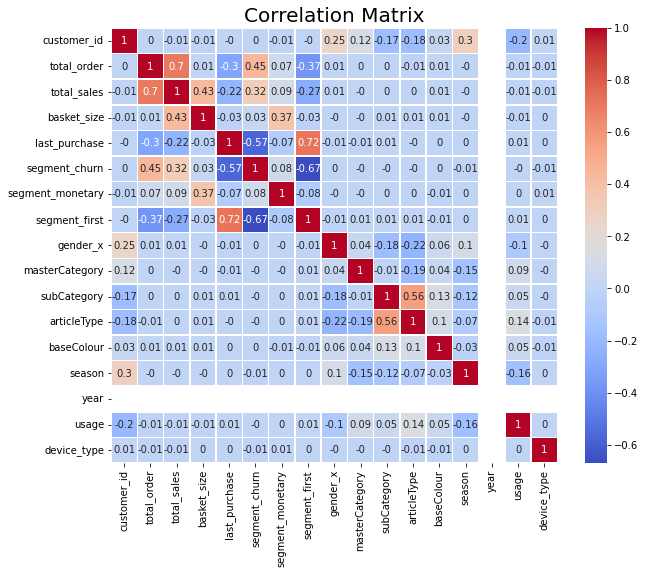

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
correlation_matrix = data3.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

## Feature Engineering

## Process Encoding

In [ ]:
le = LabelEncoder()

binary_cols = [col for col in data3.columns if data3[col].dtype not in [int, float]
               and data3[col].nunique() == 2]

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


for col in binary_cols:
    data3 = label_encoder(data3, col)

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22702 entries, 0 to 22701
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         22702 non-null  int64         
 1   total_order         22495 non-null  float64       
 2   total_sales         22495 non-null  float64       
 3   basket_size         22495 non-null  float64       
 4   last_trans          22702 non-null  object        
 5   last_purchase       22702 non-null  int64         
 6   segment_churn       22702 non-null  int64         
 7   segment_monetary    22702 non-null  int64         
 8   segment_first       22702 non-null  int64         
 9   gender_x            22702 non-null  int64         
 10  masterCategory      22702 non-null  int64         
 11  subCategory         22702 non-null  int64         
 12  articleType         22702 non-null  int64         
 13  baseColour          22702 non-null  int64     

In [ ]:
#Process misssing value
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

missing_values_table(data3)

             n_miss  ratio
total_order     207   0.91
total_sales     207   0.91
basket_size     207   0.91


In [ ]:
data3['total_order'].fillna(0,inplace=True)
data3['total_sales'].fillna(0,inplace=True)
data3['basket_size'].fillna(0,inplace=True)
data3.isna().sum()

customer_id           0
total_order           0
total_sales           0
basket_size           0
last_trans            0
last_purchase         0
segment_churn         0
segment_monetary      0
segment_first         0
gender_x              0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
device_type           0
device_id             0
birthdate             0
home_location         0
first_join_date       0
dtype: int64

pemisah

#Baseline Model

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22702 entries, 0 to 22701
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         22702 non-null  int64         
 1   total_order         22702 non-null  float64       
 2   total_sales         22702 non-null  float64       
 3   basket_size         22702 non-null  float64       
 4   last_trans          22702 non-null  object        
 5   last_purchase       22702 non-null  int64         
 6   segment_churn       22702 non-null  int64         
 7   segment_monetary    22702 non-null  int64         
 8   segment_first       22702 non-null  int64         
 9   gender_x            22702 non-null  int64         
 10  masterCategory      22702 non-null  int64         
 11  subCategory         22702 non-null  int64         
 12  articleType         22702 non-null  int64         
 13  baseColour          22702 non-null  int64     

In [ ]:
y = data3['segment_churn']
X = data3[['total_order','total_sales','basket_size','segment_first','segment_monetary']]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=27)

## Logistic Regression

In [ ]:
#baseline model without sampling
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=27)
logr.fit(X_train, y_train)
pred_test = logr.predict(X_test)
pred_train = logr.predict(X_train)

print('Training Data')
#print(classification_report(y_train, pred_train))
print(f'Accuracy : {accuracy_score(y_train, pred_train)}')
print(f'Precision : {precision_score(y_train, pred_train)}')
print(f'Recall : {recall_score(y_train, pred_train)}')
print(f'F0.5 : {fbeta_score(y_train, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy : 0.8196875367085634
Precision : 0.8702434757253243
Recall : 0.7324825131918027
F0.5 : 0.8386960798089083

Testing Data
Accuracy: 0.8146582100070472
Precision: 0.865916955017301
Recall: 0.7295918367346939
F0.5 : 0.8347231487658439


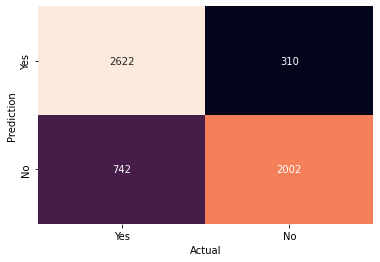

In [ ]:
def plot_confusion_matrix(y, pred):
    sns.heatmap(pd.DataFrame(confusion_matrix(y, pred), ["Yes","No"], ["Yes","No"]), annot=True, fmt=".0f", cbar=False)
    plt.xlabel("Actual")
    plt.ylabel("Prediction")
    plt.show()
    
plot_confusion_matrix(y_test, pred_test)

In [ ]:
smote = SMOTE(random_state=27)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

y_resampled.value_counts()

1    8877
0    8877
Name: segment_churn, dtype: int64

In [ ]:
#baseline model with sampling and scaling
logr = LogisticRegression(random_state=27)
logr.fit(X_resampled, y_resampled)
pred_test = logr.predict(X_test)
pred_train = logr.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8198152529007547
Precision: 0.8572866851245909
Recall: 0.7673763658893771
F0.5 : 0.8376577064017117

Testing Data
Accuracy: 0.8141296687808316
Precision: 0.8384769539078156
Recall: 0.7623906705539358
F0.5 : 0.822068531908205


## Ridge Classifier

In [ ]:
#baseline model without sampling
ridgec = RidgeClassifier(random_state=27)
ridgec.fit(X_train, y_train)
pred_test = ridgec.predict(X_test)
pred_train = ridgec.predict(X_train)

print('Training Data')
#print(classification_report(y_train, pred_train))
print(f'Accuracy : {accuracy_score(y_train, pred_train)}')
print(f'Precision : {precision_score(y_train, pred_train)}')
print(f'Recall : {recall_score(y_train, pred_train)}')
print(f'F0.5 : {fbeta_score(y_train, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy : 0.8668506989310466
Precision : 0.798760666395774
Recall : 0.9649036691618603
F0.5 : 0.8272488164124143

Testing Data
Accuracy: 0.8601127554615927
Precision: 0.7933212996389891
Recall: 0.9610058309037901
F0.5 : 0.822007481296758


In [ ]:
#baseline model with sampling and scaling
ridgec = RidgeClassifier(random_state=27)
ridgec.fit(X_resampled, y_resampled)
pred_test = ridgec.predict(X_test)
pred_train = ridgec.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8701137771769742
Precision: 0.8113922850914606
Recall: 0.9644023881942098
F0.5 : 0.8379828116129284

Testing Data
Accuracy: 0.8592318534179
Precision: 0.7921297686993091
Recall: 0.9610058309037901
F0.5 : 0.8209838107098382


## Random Forest

In [ ]:
#baseline model without sampling
randomf = RandomForestClassifier(random_state=27)
randomf.fit(X_train, y_train)
pred_test = randomf.predict(X_test)
pred_train = randomf.predict(X_train)

print('Training Data')
#print(classification_report(y_train, pred_train))
print(f'Accuracy : {accuracy_score(y_train, pred_train)}')
print(f'Precision : {precision_score(y_train, pred_train)}')
print(f'Recall : {recall_score(y_train, pred_train)}')
print(f'F0.5 : {fbeta_score(y_train, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy : 0.9987665922706449
Precision : 1.0
Recall : 0.99742299668671
F0.5 : 0.9994835345908857

Testing Data
Accuracy: 0.8340380549682875
Precision: 0.8259768451519537
Recall: 0.831997084548105
F0.5 : 0.8271739130434782


In [ ]:
#baseline model with sampling and scaling
randomf = RandomForestClassifier(random_state=27)
randomf.fit(X_resampled, y_resampled)
pred_test = randomf.predict(X_test)
pred_train = randomf.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.9987045172918779
Precision: 1.0
Recall: 0.9974090345837557
F0.5 : 0.9994807305894838

Testing Data
Accuracy: 0.8336856941508104
Precision: 0.8249097472924187
Recall: 0.8327259475218659
F0.5 : 0.8264612268518519


## Decision Tree

In [ ]:
#baseline model with sampling and scaling
randomf = RandomForestClassifier(random_state=27)
randomf.fit(X_resampled, y_resampled)
pred_test = randomf.predict(X_test)
pred_train = randomf.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.9987045172918779
Precision: 1.0
Recall: 0.9974090345837557
F0.5 : 0.9994807305894838

Testing Data
Accuracy: 0.8336856941508104
Precision: 0.8249097472924187
Recall: 0.8327259475218659
F0.5 : 0.8264612268518519


In [ ]:
#baseline model with sampling and scaling
decisiontree = DecisionTreeClassifier(random_state=27)
decisiontree.fit(X_resampled, y_resampled)
pred_test = decisiontree.predict(X_test)
pred_train = decisiontree.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.9987608426270136
Precision: 1.0
Recall: 0.9975216852540273
F0.5 : 0.9995033523714925

Testing Data
Accuracy: 0.8396758280479211
Precision: 0.8305695746214852
Recall: 0.8396501457725948
F0.5 : 0.8323699421965319


## Gradient Boosting

In [ ]:
#baseline model without sampling
gbc = GradientBoostingClassifier(random_state=27)
gbc.fit(X_train, y_train)
pred_test = gbc.predict(X_test)
pred_train = gbc.predict(X_train)

print('Training Data')
#print(classification_report(y_train, pred_train))
print(f'Accuracy : {accuracy_score(y_train, pred_train)}')
print(f'Precision : {precision_score(y_train, pred_train)}')
print(f'Recall : {recall_score(y_train, pred_train)}')
print(f'F0.5 : {fbeta_score(y_train, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy : 0.8730177375778222
Precision : 0.8002808706991674
Recall : 0.9790158301632103
F0.5 : 0.830609057782405

Testing Data
Accuracy: 0.8618745595489782
Precision: 0.7923627684964201
Recall: 0.967930029154519
F0.5 : 0.8221892025755324


In [ ]:
#baseline model with sampling and scaling
gbc = GradientBoostingClassifier(random_state=27)
gbc.fit(X_resampled, y_resampled)
pred_test = gbc.predict(X_test)
pred_train = gbc.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8776613720851639
Precision: 0.8072587297222986
Recall: 0.9922271037512673
F0.5 : 0.8385217341634774

Testing Data
Accuracy: 0.8652219873150105
Precision: 0.7889051094890511
Recall: 0.9846938775510204
F0.5 : 0.8215762588178059


# Hyperparameter Tuning

## Logistic Regression

In [ ]:
def objective_logr(params):
    penalty=params[0]
    C=params[1]
    fit_intercept=params[2]
    class_weight=params[3]
    multi_class=params[4]
    verbose=params[5]
    warm_start=params[6]

    model=LogisticRegression(
        C=C,
        penalty=penalty,
        fit_intercept=fit_intercept,
        class_weight=class_weight,
        random_state=27,
        multi_class = multi_class,
        verbose = verbose,
        warm_start = warm_start,
        n_jobs=-1,
    )
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    metric_score = fbeta_score(y_test, pred, beta=0.5)
    return 1.0 - metric_score

In [ ]:
space = [
    Categorical(['l2', 'none']),                      #penalty
    Real(0.01,1),                                     #C
    Categorical([True, False]),                       #fit_intercept
    Categorical(['balanced', None]),                  #class_weight
    Categorical(['auto', 'ovr', 'multinomial']),      #multi_class
    Integer(1,10),                                    #verbose   
    Categorical([True, False]),                       #warm_start
]

In [ ]:
r = gp_minimize(
    objective_logr, space, n_calls=10, 
    random_state=27, verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1811
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 2 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1228
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 3 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1338s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1608
Function value obtained: 0.1653
Current minimum: 0.1653
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1550
Function value obtained: 0.1779
Current minimum: 0.1653
Iteration No: 5 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1560
Function value obtained: 0.1653
Current minimum: 0.1653
Iteration No: 6 started. Evaluating function at random point.
Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.1367
Function value obtained: 0.1653
Current minimum: 0.1653
Iteration No: 7 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.1514
Function value obtained: 0.1779
Current minimum: 0.1653
Iteration No: 8 started. Evaluating function at random point.
Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.1457
Function value obtained: 0.1779
Current minimum: 0.1653
Iteration No: 9 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.1070
Function value obtained: 0.1653
Current minimum: 0.1653
Iteration No: 10 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 0.6367
Function value obtained: 0.1653
Current minimum: 0.1653


In [ ]:
r.x

['l2', 0.07671322099274436, False, None, 'auto', 10, False]

In [ ]:
logr = LogisticRegression(penalty='none', C=0.8954896615626556, fit_intercept=False, 
                          class_weight='balanced', random_state=27, multi_class='auto', 
                          verbose=1, warm_start=True, n_jobs=-1,
                          )
logr.fit(X_train, y_train)
pred_test = logr.predict(X_test)
pred_train = logr.predict(X_train)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_train, pred_train)}')
print(f'Precision: {precision_score(y_train, pred_train)}')
print(f'Recall: {recall_score(y_train, pred_train)}')
print(f'F0.5 : {fbeta_score(y_train, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8209796781393164
Precision: 0.8461120911928348
Recall: 0.7651245551601423
F0.5 : 0.8285714285714284

Testing Data
Accuracy: 0.8141296687808316
Precision: 0.8384769539078156
Recall: 0.7623906705539358
F0.5 : 0.822068531908205


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


Perbandingan Hasil

In [ ]:
def objective_logr_resampled(params):
    penalty=params[0]
    C=params[1]
    fit_intercept=params[2]
    class_weight=params[3]
    multi_class=params[4]
    verbose=params[5]
    warm_start=params[6]

    model=LogisticRegression(
        C=C,
        penalty=penalty,
        fit_intercept=fit_intercept,
        class_weight=class_weight,
        random_state=27,
        multi_class = multi_class,
        verbose = verbose,
        warm_start = warm_start,
        n_jobs=-1,
    )
    model.fit(X_resampled, y_resampled)
    pred = model.predict(X_test)
    metric_score = fbeta_score(y_test, pred, beta=0.5)
    return 1.0 - metric_score

In [ ]:
r = gp_minimize(
    objective_logr_resampled, space, n_calls=10, 
    random_state=27, verbose=True
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.1786
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 2 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.1300
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 3 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1148s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.1369
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 4 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.1531
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 5 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.1532
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 6 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 0.1640
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 7 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 0.1436
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 8 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 0.1271
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 9 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 0.1366
Function value obtained: 0.1779
Current minimum: 0.1779
Iteration No: 10 started. Evaluating function at random point.


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 0.6658
Function value obtained: 0.1779
Current minimum: 0.1779


In [ ]:
r.x

['l2', 0.9157712501886736, False, 'balanced', 'multinomial', 9, True]

In [ ]:
logr = LogisticRegression(penalty='none', C=0.3859051627311702, fit_intercept=False, 
                          class_weight=None, random_state=27, multi_class='multinomial',
                          verbose=5, warm_start=True, n_jobs=-1,
                          )
logr.fit(X_resampled, y_resampled)
pred_test = logr.predict(X_test)
pred_train = logr.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


Training Data
Accuracy: 0.8198152529007547
Precision: 0.8572866851245909
Recall: 0.7673763658893771
F0.5 : 0.8376577064017117

Testing Data
Accuracy: 0.8141296687808316
Precision: 0.8384769539078156
Recall: 0.7623906705539358
F0.5 : 0.822068531908205


Perbandingan Metrics

## Ridge Classifier

In [ ]:
def objective_rc(params):
    alpha=params[0]
    fit_intercept=params[1]
    class_weight=params[2]
    solver=params[3]

    model=RidgeClassifier(
        alpha=alpha,
        fit_intercept=fit_intercept,
        class_weight=class_weight,
        solver=solver,
        random_state=27,
    )
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    metric_score = fbeta_score(y_test, pred, beta=0.5)
    return 1.0 - metric_score

In [ ]:
def objective_rc_resampled(params):
    alpha=params[0]
    fit_intercept=params[1]
    class_weight=params[2]
    solver=params[3]
    
    model=RidgeClassifier(
        alpha=alpha,
        fit_intercept=fit_intercept,
        class_weight=class_weight,
        solver=solver,
        random_state=27,
    )
    model.fit(X_resampled, y_resampled)
    pred = model.predict(X_test)
    metric_score = fbeta_score(y_test, pred, beta=0.5)
    return 1.0 - metric_score

In [ ]:
space = [
    Real(1.00,5.00),                                   #alpha
    Categorical([True, False]),                        #fit_intercept
    Categorical(['balanced', None]),                   #class_weight
    Categorical(['auto', 'svd', 'cholesky', 
                 'lsqr', 'sparse_cg', 'sag', 'saga'])  #solver
]

In [ ]:
r = gp_minimize(
    objective_rc, space, n_calls=10, 
    random_state=27, verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0205
Function value obtained: 0.1710
Current minimum: 0.1710
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.7120
Function value obtained: 0.2249
Current minimum: 0.1710
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0284
Function value obtained: 0.1710
Current minimum: 0.1710
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0240
Function value obtained: 0.1901
Current minimum: 0.1710
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0309
Function value obtained: 0.1790
Current minimum: 0.1710
Iteration No: 6 started. Evaluating

In [ ]:
r.x

[3.0639798794261295, False, 'balanced', 'sag']

In [ ]:
ridgec = RidgeClassifier(alpha=1.3435359300562024, fit_intercept=False, 
                         class_weight='balanced', solver='lsqr', random_state=27)
ridgec.fit(X_train, y_train)
pred_test = ridgec.predict(X_test)
pred_train = ridgec.predict(X_train)

Perbandingan Metrics

In [ ]:
r = gp_minimize(
    objective_rc_resampled, space, n_calls=10, 
    n_initial_points=5, random_state=27, verbose=True
)

Iteration No: 1 started. Evaluating function at random point.


TypeError: ignored

In [ ]:
r.x

[2.1753884845810125, True, None, 'saga']

In [ ]:
ridgec = RidgeClassifier(alpha=1.0196219345970365, fit_intercept=False, 
                         class_weight='balanced', solver='auto', random_state=27)
ridgec.fit(X_resampled, y_resampled)
pred_test = ridgec.predict(X_test)
pred_train = ridgec.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8587923848146897
Precision: 0.7967759970182632
Recall: 0.9632758814914949
F0.5 : 0.8253064376025481

Testing Data
Accuracy: 0.8486610288935871
Precision: 0.7799227799227799
Recall: 0.956997084548105
F0.5 : 0.8098939057488279


Perbandingan Hasil 

## Random Forest

In [ ]:
def objective_rf(params):
  n_estimators=params[0]
  criterion=params[1]
  max_depth=params[2]
  min_samples_split=params[3]
  min_samples_leaf=params[4]
  max_features=params[5]
  bootstrap=params[6]
  class_weight=params[7]
    
  model=RandomForestClassifier(

    n_estimators = n_estimators,
    max_depth = max_depth,
    min_samples_split = min_samples_split,
    min_samples_leaf = min_samples_leaf,
    max_features = max_features,
    bootstrap = bootstrap,
    class_weight = class_weight,
    criterion = criterion
    )
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  metric_score = fbeta_score(y_test, pred, beta=0.5)
  return 1.0 - metric_score

In [ ]:
def objective_rf_resampled(params):
  n_estimators=params[0]
  criterion=params[1]
  max_depth=params[2]
  min_samples_split=params[3]
  min_samples_leaf=params[4]
  max_features=params[5]
  bootstrap=params[6]
  class_weight=params[7]
    
  model=RandomForestClassifier(

    n_estimators = n_estimators,
    max_depth = max_depth,
    min_samples_split = min_samples_split,
    min_samples_leaf = min_samples_leaf,
    max_features = max_features,
    bootstrap = bootstrap,
    class_weight = class_weight,
    criterion = criterion
    )
  model.fit(X_resampled, y_resampled)
  pred = model.predict(X_test)
  metric_score = fbeta_score(y_test, pred, beta=0.5)
  return 1.0 - metric_score

In [ ]:
space = [
  Integer(100,500),                                 #n_estimators     
  Categorical(['gini', 'entropy']),                 #criterion     
  Integer(2,100),                                    #max_depth     
  Integer(2,1000),                                  #min_samples_split     
  Integer(2,100),                                   #min_samples_leaf
  Categorical(['sqrt', 'log2', None]),              #max_features
  Categorical([True, False]),                       #bootstrap
  Categorical([None, 'balanced'])                   #class_weight
]

In [ ]:
r = gp_minimize(
    objective_rf, space, n_calls=10, 
    random_state=27, verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 11.1359
Function value obtained: 0.1806
Current minimum: 0.1806
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.6233
Function value obtained: 0.1778
Current minimum: 0.1778
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.1155
Function value obtained: 0.1780
Current minimum: 0.1778
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 3.3275
Function value obtained: 0.1788
Current minimum: 0.1778
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 5.0174
Function value obtained: 0.1780
Current minimum: 0.1778
Iteration No: 6 started. Evaluatin

In [ ]:
r.x

[261, 'gini', 36, 818, 2, 'log2', False, None]

In [ ]:
randomf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=95, 
                                 min_samples_split=1000, min_samples_leaf=100, max_features='sqrt', 
                                 bootstrap=False, class_weight='balanced',random_state=27)
randomf.fit(X_train, y_train)
pred_test = randomf.predict(X_test)
pred_train = randomf.predict(X_train)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_train, pred_train)}')
print(f'Precision: {precision_score(y_train, pred_train)}')
print(f'Recall: {recall_score(y_train, pred_train)}')
print(f'F0.5 : {fbeta_score(y_train, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8669094326324445
Precision: 0.7988418165193538
Recall: 0.9649036691618603
F0.5 : 0.827318448685844

Testing Data
Accuracy: 0.8601127554615927
Precision: 0.7933212996389891
Recall: 0.9610058309037901
F0.5 : 0.822007481296758


Hasil sebelum ditunning

In [ ]:
r = gp_minimize(
    objective_rf_resampled, space, n_calls=10, 
    random_state=27, verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 9.8381
Function value obtained: 0.1805
Current minimum: 0.1805
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 4.8710
Function value obtained: 0.1788
Current minimum: 0.1788
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.1550
Function value obtained: 0.1780
Current minimum: 0.1780
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 3.5016
Function value obtained: 0.1788
Current minimum: 0.1780
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 5.1878
Function value obtained: 0.1780
Current minimum: 0.1780
Iteration No: 6 started. Evaluating

In [ ]:
r.x

[182, 'gini', 19, 955, 25, 'sqrt', True, 'balanced']

In [ ]:
randomf = RandomForestClassifier(n_estimators=163, criterion='gini', max_depth=22, 
                                 min_samples_split=1000, min_samples_leaf=55, max_features='sqrt', 
                                 bootstrap=False, class_weight=None,random_state=27)
randomf.fit(X_resampled, y_resampled)
pred_test = randomf.predict(X_test)
pred_train = randomf.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8710713078742819
Precision: 0.8121091529277998
Recall: 0.9655288948969246
F0.5 : 0.838764605718983

Testing Data
Accuracy: 0.8606412966878083
Precision: 0.7933313307299489
Recall: 0.9624635568513119
F0.5 : 0.8222291407222914


## Decision Tree

In [ ]:
def objective_dt(params):
  criterion=params[0]
  splitter=params[1]
  max_depth=params[2]
  min_samples_split=params[3]
  min_samples_leaf=params[4]
  max_features=params[5]
  class_weight=params[6]
    
  model=DecisionTreeClassifier(
    criterion = criterion,
    splitter = splitter,
    max_depth=max_depth,
    min_samples_split = min_samples_split,
    min_samples_leaf = min_samples_leaf,
    max_features = max_features,
    class_weight = class_weight,
    )
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  metric_score = fbeta_score(y_test, pred, beta=0.5)
  return 1.0 - metric_score

In [ ]:
def objective_dt_resampled(params):
  criterion=params[0]
  splitter=params[1]
  max_depth=params[2]
  min_samples_split=params[3]
  min_samples_leaf=params[4]
  max_features=params[5]
  class_weight=params[6]
    
  model=DecisionTreeClassifier(
    criterion = criterion,
    splitter = splitter,
    max_depth=max_depth,
    min_samples_split = min_samples_split,
    min_samples_leaf = min_samples_leaf,
    max_features = max_features,
    class_weight = class_weight,
    )
  model.fit(X_resampled, y_resampled)
  pred = model.predict(X_test)
  metric_score = fbeta_score(y_test, pred, beta=0.5)
  return 1.0 - metric_score

In [ ]:
space = [
    Categorical(['gini', 'entropy']),                 #criterion  
    Categorical(['best', 'random']),                  #splitter
    Integer(2,100),                                    #max_depth     
    Integer(2,1000),                                  #min_samples_split     
    Integer(2,100),                                   #min_samples_leaf
    Categorical(['sqrt', 'log2', None]),              #max_features
    Categorical([None, 'balanced'])                   #class_weight
]

In [ ]:
r = gp_minimize(
    objective_dt, space, n_calls=10, 
    random_state=27, verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0180
Function value obtained: 0.1804
Current minimum: 0.1804
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0219
Function value obtained: 0.1797
Current minimum: 0.1797
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0557
Function value obtained: 0.1794
Current minimum: 0.1794
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0144
Function value obtained: 0.4609
Current minimum: 0.1794
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0407
Function value obtained: 0.1765
Current minimum: 0.1765
Iteration No: 6 started. Evaluating

In [ ]:
r.x

['gini', 'best', 22, 584, 85, None, None]

In [ ]:
decisiontree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=51, 
                                      min_samples_split=1000, min_samples_leaf=2, 
                                      max_features='sqrt', class_weight='balanced',random_state=27)
decisiontree.fit(X_train, y_train)
pred_test = decisiontree.predict(X_test)
pred_train = decisiontree.predict(X_train)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_train, pred_train)}')
print(f'Precision: {precision_score(y_train, pred_train)}')
print(f'Recall: {recall_score(y_train, pred_train)}')
print(f'F0.5 : {fbeta_score(y_train, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8674967696464231
Precision: 0.7901526341703594
Recall: 0.9846606945637502
F0.5 : 0.8226537349545817

Testing Data
Accuracy: 0.8629316420014095
Precision: 0.7864219114219114
Recall: 0.983600583090379
F0.5 : 0.8192690626517727


Hasil Sebelum dituning

In [ ]:
r = gp_minimize(
    objective_dt_resampled, space, n_calls=10, 
    random_state=27, verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0838
Function value obtained: 0.1801
Current minimum: 0.1801
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0583
Function value obtained: 0.1762
Current minimum: 0.1762
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0972
Function value obtained: 0.1779
Current minimum: 0.1762
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0192
Function value obtained: 0.4437
Current minimum: 0.1762
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0569
Function value obtained: 0.1773
Current minimum: 0.1762
Iteration No: 6 started. Evaluating

In [ ]:
r.x

['gini', 'best', 64, 350, 82, 'sqrt', None]

In [ ]:
decisiontree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=35, 
                                      min_samples_split=1000, min_samples_leaf=21, 
                                      max_features='sqrt', class_weight='balanced',random_state=27)
decisiontree.fit(X_resampled, y_resampled)
pred_test = decisiontree.predict(X_test)
pred_train = decisiontree.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8680860651120874
Precision: 0.7999632791701092
Recall: 0.9816379407457474
F0.5 : 0.8307117390226696

Testing Data
Accuracy: 0.8574700493305144
Precision: 0.783641160949868
Recall: 0.9741253644314869
F0.5 : 0.8155357578716134


## Gradient Boosting

In [ ]:
def objective_gbc(params):
  loss=params[0]
  learning_rate=params[1]
  n_estimators=params[2]
  min_samples_split=params[3]
  min_samples_leaf=params[4]
  max_depth=params[5]
  max_features=params[6]
    
  model=GradientBoostingClassifier(
    loss=loss,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_depth=max_depth,
    max_features=max_features,
    )
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  metric_score = fbeta_score(y_test, pred, beta=0.5)
  return 1.0 - metric_score

In [ ]:
def objective_gbc_resampled(params):
  loss=params[0]
  learning_rate=params[1]
  n_estimators=params[2]
  min_samples_split=params[3]
  min_samples_leaf=params[4]
  max_depth=params[5]
  max_features=params[6]
    
  model=GradientBoostingClassifier(
    loss=loss,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_depth=max_depth,
    max_features=max_features,
    )
  model.fit(X_resampled, y_resampled)
  pred = model.predict(X_test)
  metric_score = fbeta_score(y_test, pred, beta=0.5)
  return 1.0 - metric_score

In [ ]:
space = [
    Categorical(['deviance', 'exponential']),         #loss  
    Real(0.1,10.0),                                   #learning_rate
    Integer(100,500),                                 #n_estimators
    Integer(2,1000),                                  #min_samples_split     
    Integer(2,100),                                   #min_samples_leaf
    Integer(2,100),                                   #max_depth
    Categorical([None, 'sqrt', 'log2'])               #max_features
]

In [ ]:
r = gp_minimize(
    objective_gbc, space, n_calls=10, 
    random_state=27, verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 6.2756
Function value obtained: 0.3078
Current minimum: 0.3078
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 3.3280
Function value obtained: 0.1915
Current minimum: 0.1915
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 52.0680
Function value obtained: 0.1712
Current minimum: 0.1712
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 7.5390
Function value obtained: 0.3359
Current minimum: 0.1712
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 5.9560
Function value obtained: 0.1804
Current minimum: 0.1712
Iteration No: 6 started. Evaluatin

In [ ]:
r.x

['exponential', 0.27884514768235896, 151, 737, 22, 89, 'sqrt']

In [ ]:
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.32462369934974167, 
                                 n_estimators=253, min_samples_split=564, 
                                 min_samples_leaf=100, max_depth=2 , 
                                 max_features='sqrt', random_state=27)
gbc.fit(X_train, y_train)
pred_test = gbc.predict(X_test)
pred_train = gbc.predict(X_train)

print('Training Data')
#print(classification_report(y_train, pred_train))
print(f'Accuracy: {accuracy_score(y_train, pred_train)}')
print(f'Precision: {precision_score(y_train, pred_train)}')
print(f'Recall: {recall_score(y_train, pred_train)}')
print(f'F0.5 : {fbeta_score(y_train, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8796546458357806
Precision: 0.8117334423548651
Recall: 0.9745981101975703
F0.5 : 0.8398012054562758

Testing Data
Accuracy: 0.8604651162790697
Precision: 0.7955784373107208
Recall: 0.9573615160349854
F0.5 : 0.8234077231695086


Sebelum tunning

In [ ]:
r = gp_minimize(
    objective_gbc_resampled, space, n_calls=10, 
    random_state=27, verbose=True
)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 14.9188
Function value obtained: 0.5192
Current minimum: 0.5192
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.7482
Function value obtained: 0.1972
Current minimum: 0.1972
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 55.5048
Function value obtained: 0.1725
Current minimum: 0.1725
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 7.8135
Function value obtained: 0.3482
Current minimum: 0.1725
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 6.3136
Function value obtained: 0.1804
Current minimum: 0.1725
Iteration No: 6 started. Evaluati

In [ ]:
r.x

['exponential', 0.27884514768235896, 151, 737, 22, 89, 'sqrt']

In [ ]:
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.1125630205638218, 
                                 n_estimators=500, min_samples_split=2, 
                                 min_samples_leaf=72, max_depth=2, 
                                 max_features='log2' ,random_state=27)
gbc.fit(X_resampled, y_resampled)
pred_test = gbc.predict(X_test)
pred_train = gbc.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8809282415230371
Precision: 0.8134210770228937
Recall: 0.9886222823025796
F0.5 : 0.8433109757269425

Testing Data
Accuracy: 0.8638125440451022
Precision: 0.7909654561558902
Recall: 0.9763119533527697
F0.5 : 0.8221826663393076


# Compare Models

In [ ]:
model1 = LogisticRegression()
model2 = RidgeClassifier()
model3 = RandomForestClassifier()
model4 = DecisionTreeClassifier()
model5 = GradientBoostingClassifier()

param1 = {}
param1['classifier__penalty'] = ['none']
param1['classifier__C'] = [0.8954896615626556]
param1['classifier__fit_intercept'] = [False]
param1['classifier__class_weight'] = ['balanced']
param1['classifier__random_state'] = [27]
param1['classifier__multi_class'] = ['auto']
param1['classifier__verbose'] = [1]
param1['classifier__warm_start'] = [True]
param1['classifier__n_jobs'] = [-1]
param1['classifier'] = [model1]

param2 = {}
param2['classifier__alpha'] = [1.3435359300562024]
param2['classifier__fit_intercept'] = [False]
param2['classifier__class_weight'] = ['balanced']
param2['classifier__solver'] = ['lsqr']
param2['classifier__random_state'] = [27]
param2['classifier'] = [model2]

param3 = {}
param3['classifier__n_estimators'] = [100]
param3['classifier__criterion'] = ['gini']
param3['classifier__max_depth'] = [95]
param3['classifier__min_samples_split'] = [1000]
param3['classifier__min_samples_leaf'] = [100]
param3['classifier__max_features'] = ['sqrt']
param3['classifier__bootstrap'] = [False]
param3['classifier__class_weight'] = ['balanced']
param3['classifier__random_state'] = [27]
param3['classifier__n_jobs'] = [-1]
param3['classifier'] = [model3]

param4 = {}
param4['classifier__criterion'] = ['gini']
param4['classifier__splitter'] = ['best']
param4['classifier__max_depth'] = [51]
param4['classifier__min_samples_split'] = [1000]
param4['classifier__min_samples_leaf'] = [2]
param4['classifier__max_features'] = ['sqrt']
param4['classifier__class_weight'] = ['balanced']
param4['classifier__random_state'] = [27]
param4['classifier'] = [model4]

param5 = {}
param5['classifier__loss'] = ['deviance']
param5['classifier__learning_rate'] = [0.32462369934974167]
param5['classifier__n_estimators'] = [253]
param5['classifier__min_samples_split'] = [564]
param5['classifier__min_samples_leaf'] = [100]
param5['classifier__max_depth'] = [2]
param5['classifier__max_features'] = ['sqrt']
param5['classifier__random_state'] = [27]
param5['classifier'] = [model5]

In [ ]:
pipeline = Pipeline([('classifier', model5)])
params = [param1, param2, param3, param4, param5]
f05 = make_scorer(fbeta_score, beta=0.5)

In [ ]:
paramr1 = {}
paramr1['classifier__penalty'] = ['none']
paramr1['classifier__C'] = [0.3859051627311702]
paramr1['classifier__fit_intercept'] = [False]
paramr1['classifier__class_weight'] = [None]
paramr1['classifier__random_state'] = [27]
paramr1['classifier__multi_class'] = ['multinomial']
paramr1['classifier__verbose'] = [5]
paramr1['classifier__warm_start'] = [True]
paramr1['classifier__n_jobs'] = [-1]
paramr1['classifier'] = [model1]

paramr2 = {}
paramr2['classifier__alpha'] = [1.0196219345970365]
paramr2['classifier__fit_intercept'] = [False]
paramr2['classifier__class_weight'] = ['balanced']
paramr2['classifier__solver'] = ['auto']
paramr2['classifier__random_state'] = [27]
paramr2['classifier'] = [model2]

paramr3 = {}
paramr3['classifier__n_estimators'] = [163]
paramr3['classifier__criterion'] = ['gini']
paramr3['classifier__max_depth'] = [22]
paramr3['classifier__min_samples_split'] = [1000]
paramr3['classifier__min_samples_leaf'] = [55]
paramr3['classifier__max_features'] = ['sqrt']
paramr3['classifier__bootstrap'] = [False]
paramr3['classifier__class_weight'] = [None]
paramr3['classifier__random_state'] = [27]
paramr3['classifier__n_jobs'] = [-1]
paramr3['classifier'] = [model3]

paramr4 = {}
paramr4['classifier__criterion'] = ['entropy']
paramr4['classifier__splitter'] = ['best']
paramr4['classifier__max_depth'] = [35]
paramr4['classifier__min_samples_split'] = [1000]
paramr4['classifier__min_samples_leaf'] = [21]
paramr4['classifier__max_features'] = ['sqrt']
paramr4['classifier__class_weight'] = ['balanced']
paramr4['classifier__random_state'] = [27]
paramr4['classifier'] = [model4]

paramr5 = {}
paramr5['classifier__loss'] = ['deviance']
paramr5['classifier__learning_rate'] = [0.1125630205638218]
paramr5['classifier__n_estimators'] = [500]
paramr5['classifier__min_samples_split'] = [2]
paramr5['classifier__min_samples_leaf'] = [72]
paramr5['classifier__max_depth'] = [2]
paramr5['classifier__max_features'] = ['log2']
paramr5['classifier__random_state'] = [27]
paramr5['classifier'] = [model5]

In [ ]:
pipeline = Pipeline([('classifier', model5)])
params_resampled = [paramr1, paramr2, paramr3, paramr4, paramr5]

In [ ]:
gs = GridSearchCV(pipeline, params_resampled, cv=3, n_jobs=-1, scoring=f05).fit(X_resampled, y_resampled)

In [ ]:
gs.best_params_

{'classifier': RandomForestClassifier(bootstrap=False, max_depth=22, max_features='sqrt',
                        min_samples_leaf=55, min_samples_split=1000,
                        n_estimators=163, n_jobs=-1, random_state=27),
 'classifier__bootstrap': False,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': 22,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 55,
 'classifier__min_samples_split': 1000,
 'classifier__n_estimators': 163,
 'classifier__n_jobs': -1,
 'classifier__random_state': 27}

In [ ]:
randomf = RandomForestClassifier(n_estimators=163, criterion='gini', max_depth=22, 
                                 min_samples_split=1000, min_samples_leaf=55, max_features='sqrt', 
                                 bootstrap=False, class_weight=None, n_jobs=-1, random_state=27)
randomf.fit(X_resampled, y_resampled)
pred_test = randomf.predict(X_test)
pred_train = randomf.predict(X_resampled)

print('Training Data')
#print(classification_report(y_resampled, pred_train))
print(f'Accuracy: {accuracy_score(y_resampled, pred_train)}')
print(f'Precision: {precision_score(y_resampled, pred_train)}')
print(f'Recall: {recall_score(y_resampled, pred_train)}')
print(f'F0.5 : {fbeta_score(y_resampled, pred_train, beta=0.5)}')

print('\nTesting Data')
#print(classification_report(y_test, pred_test))
print(f'Accuracy: {accuracy_score(y_test, pred_test)}')
print(f'Precision: {precision_score(y_test, pred_test)}')
print(f'Recall: {recall_score(y_test, pred_test)}')
print(f'F0.5 : {fbeta_score(y_test, pred_test, beta=0.5)}')

Training Data
Accuracy: 0.8710713078742819
Precision: 0.8121091529277998
Recall: 0.9655288948969246
F0.5 : 0.838764605718983

Testing Data
Accuracy: 0.8606412966878083
Precision: 0.7933313307299489
Recall: 0.9624635568513119
F0.5 : 0.8222291407222914


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=27, shuffle=True)
# create model
model = RandomForestClassifier(n_estimators=100, 
                                 criterion='gini', max_depth=95, min_samples_split=1000, 
                                 min_samples_leaf=100, max_features='sqrt', bootstrap=False, 
                                 class_weight='balanced', n_jobs=-1, random_state=27)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring=f05, cv=cv, n_jobs=-1)
# report performance
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



Cross-Validation accuracy: 0.827 +/- 0.014


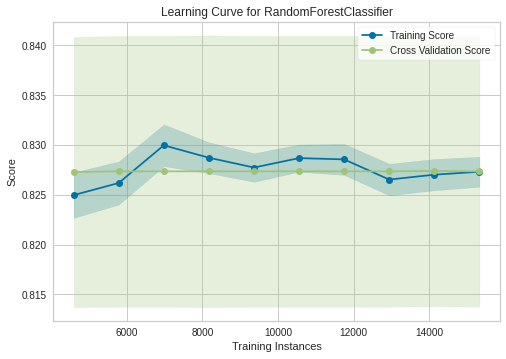

In [ ]:
from yellowbrick.model_selection import LearningCurve

sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    model, cv=cv, scoring=f05, train_sizes=sizes, 
)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

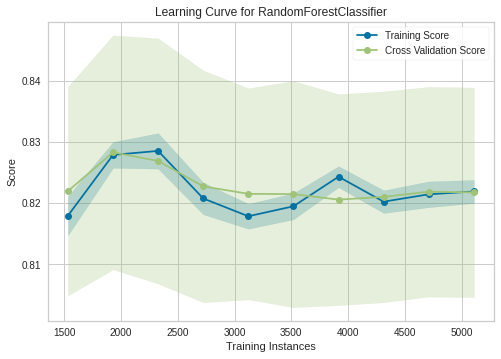

In [ ]:
visualizer = LearningCurve(
    model, cv=cv, scoring=f05, train_sizes=sizes, 
)

visualizer.fit(X_test, y_test)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

#Feature Importance

In [ ]:

models=[LogisticRegressionCV,RidgeClassifierCV,RandomForestClassifier,DecisionTreeClassifier,GradientBoostingClassifier]
for i in models:
    model = i().fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(classification_report(y_test, y_predict))
    imb_rf = roc_auc_score(y_test, y_predict)
    print('ROC-AUC Score: ',model,imb_rf)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      2932
           1       0.87      0.73      0.79      2744

    accuracy                           0.81      5676
   macro avg       0.82      0.81      0.81      5676
weighted avg       0.82      0.81      0.81      5676

ROC-AUC Score:  LogisticRegressionCV() 0.8119309797588885
              precision    recall  f1-score   support

           0       0.05      0.02      0.03      2932
           1       0.34      0.53      0.41      2744

    accuracy                           0.27      5676
   macro avg       0.19      0.27      0.22      5676
weighted avg       0.19      0.27      0.21      5676

ROC-AUC Score:  RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ])) 0.27437464948949764
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2932
           1       0.83      0.83      0.83      2744

    accuracy                        

In [ ]:
y_pred = randomf.predict(X_test)

In [ ]:
# Instantiate the best model after hyperparameter tuning
rf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 50)

# Fit the model
rf.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = rf.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.99747401 0.62356526 0.0149986  0.55647941 0.65209507 0.00202331
 0.98190442 0.00290661 0.00309446 0.60497708]


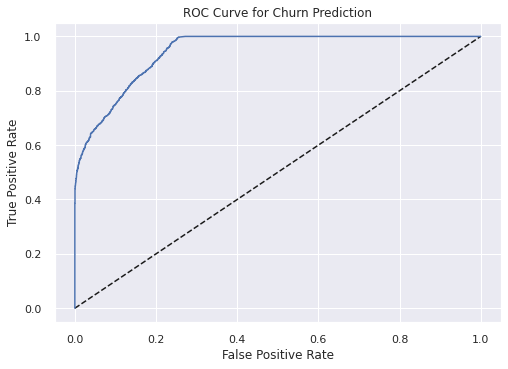

In [ ]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction')
plt.show()

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.9454106615848444
[[2244  688]
 [ 103 2641]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2932
           1       0.79      0.96      0.87      2744

    accuracy                           0.86      5676
   macro avg       0.87      0.86      0.86      5676
weighted avg       0.88      0.86      0.86      5676



In [ ]:
rf.feature_importances_

array([0.30965332, 0.13886048, 0.02952124, 0.51926718, 0.00269778])

In [ ]:
fitur = pd.DataFrame({'feature':X_train.columns, 'coef':rf.feature_importances_})

In [ ]:
fitur.sort_values(by='coef').sort_values(by='coef', ascending=False)

,feature,coef
3,segment_first,0.519267
0,total_order,0.309653
1,total_sales,0.138860
2,basket_size,0.029521
4,segment_monetary,0.002698


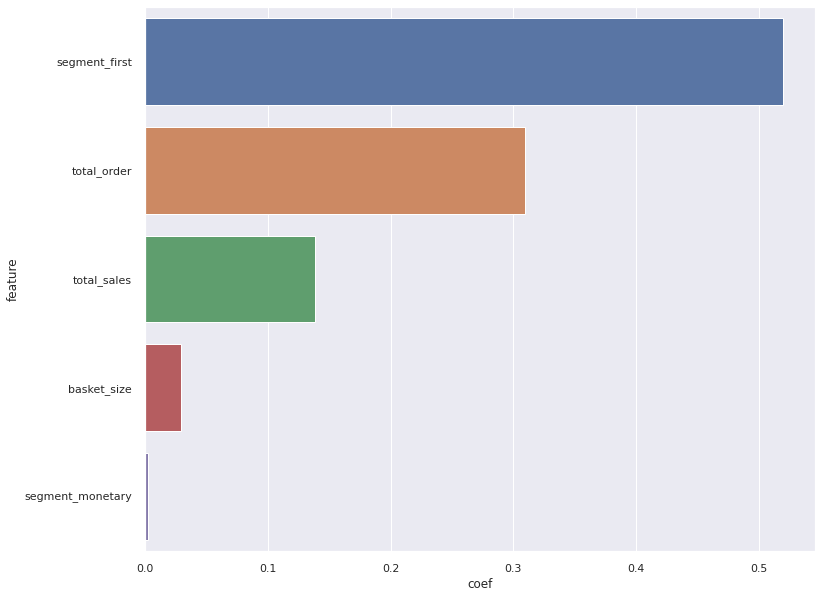

In [ ]:
plt.figure(figsize=(12,10))
sns.barplot(data=fitur.sort_values(by='coef', ascending=False), y="feature", x="coef")

# Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(rf, step = 15)
rfe = rfe.fit(X, y)

In [ ]:
# Getting the predicted values on the full dataset
y_train_pred = rf.predict(X)
y_train_pred[:10]

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
rfe.support_

array([ True, False, False,  True, False])

In [ ]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('total_order', True, 1),
 ('total_sales', False, 2),
 ('basket_size', False, 2),
 ('segment_first', True, 1),
 ('segment_monetary', False, 2)]

In [ ]:
# col = X_train.columns[rfe.support_]
col = X.columns
X.columns[~rfe.support_]

Index(['total_sales', 'basket_size', 'segment_monetary'], dtype='object')

In [ ]:
import statsmodels.api as sm
X_sm = sm.add_constant(X[col])
logm2 = sm.GLM(y,X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          segment_churn   No. Observations:                22702
Model:                            GLM   Df Residuals:                    22696
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7447.4
Date:                Sun, 20 Nov 2022   Deviance:                       14895.
Time:                        14:43:00   Pearson chi2:                 1.35e+16
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1842      0.075     -2.470      0.014      -0.330      -0.038
total_order          0.0824      0.007     11.366      0.000       0.068       0.097
total_sales       5.021e-08   1.22e-08      4.114      0.000    2.63e-08    7.41e-08
basket_size      -3.317e-07   9.68e-08     -3.427      0.001   -5.21e-07   -1.42e-07
segment_first       -1.4482      0.034    -42.267      0.000      -1.515      -1.381
segment_monetary     0.0414      0.035      1.170      0.242      -0.028       0.111
====================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_full_pred = res.predict(X_sm)
y_full_pred[:10]

0    0.540049
1    0.764332
2    0.320085
3    0.011071
4    0.011442
5    0.562085
6    0.973501
7    0.691651
8    0.753099
9    0.787618
dtype: float64

In [ ]:
y_full_pred = y_full_pred.values.reshape(-1)
y_full_pred[:10]

array([0.54004887, 0.7643318 , 0.32008476, 0.0110712 , 0.01144155,
       0.56208476, 0.973501  , 0.69165126, 0.75309884, 0.78761801])

In [ ]:
y_full_pred_final = pd.DataFrame({'Churn':y.values, 'Churn_Prob':y_full_pred})
y_full_pred_final['customer_id'] = segm_raw['customer_id']
y_full_pred_final

,Churn,Churn_Prob,customer_id
0,1,0.540049,3
1,0,0.764332,8
2,0,0.320085,9
3,0,0.011071,11
4,0,0.011442,15
...,...,...,...
22697,1,0.003110,44872
22698,1,0.003110,44874
22699,1,0.003110,44875
22700,1,0.003110,44876


In [ ]:
y_full_pred_final['predicted'] = y_full_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_full_pred_final.head()

,Churn,Churn_Prob,customer_id,predicted
0,1,0.540049,3,1
1,0,0.764332,8,1
2,0,0.320085,9,1
3,0,0.011071,11,0
4,0,0.011442,15,0


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_full_pred_final.Churn, y_full_pred_final.predicted))

0.8556514844507092


In [ ]:
predictions = pd.DataFrame()
predictions['true'] = y_train
predictions['preds'] = rf.predict(X_train)

In [ ]:
predictions_test = pd.DataFrame()
predictions_test['true'] = y_test
predictions_test['preds'] = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
train_acc = accuracy_score(predictions.true, predictions.preds)
test_acc = accuracy_score(predictions_test.true, predictions_test.preds)

print(f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

Train Acc: 0.8729, Test Acc: 0.8606


In [ ]:
print(classification_report(predictions.true, predictions.preds))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      8877
           1       0.81      0.96      0.88      8149

    accuracy                           0.87     17026
   macro avg       0.88      0.88      0.87     17026
weighted avg       0.89      0.87      0.87     17026



In [ ]:
print(classification_report(predictions_test.true, predictions_test.preds))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2932
           1       0.80      0.95      0.87      2744

    accuracy                           0.86      5676
   macro avg       0.87      0.86      0.86      5676
weighted avg       0.87      0.86      0.86      5676



In [ ]:
probs = rf.predict_proba(X_test)[:, 1]
probs

array([0.99747401, 0.62356526, 0.0149986 , ..., 0.03316835, 0.00413851,
       0.0225599 ])

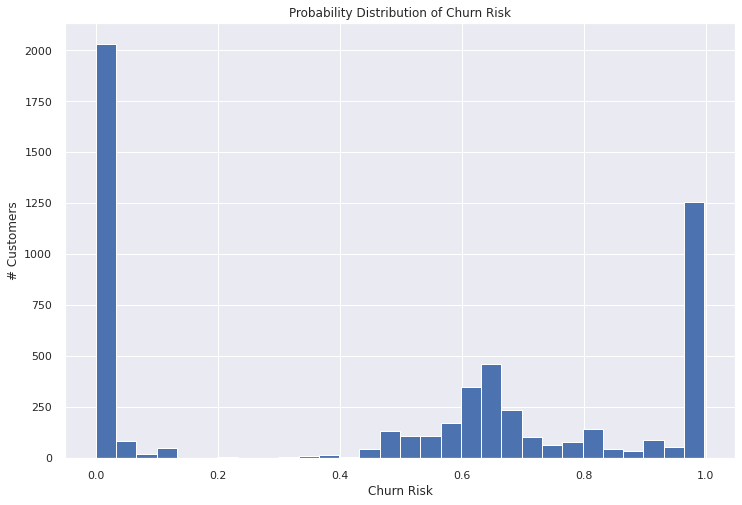

In [ ]:
from matplotlib.pyplot import figure
plt.figure(figsize=(12, 8))

plt.hist(probs, bins = int(180/6))
plt.title('Probability Distribution of Churn Risk')
plt.xlabel('Churn Risk')
plt.ylabel('# Customers')
plt.show()

# Merge Prediction Table 

In [ ]:
y_full_pred_final

,Churn,Churn_Prob,customer_id,predicted
0,1,0.540049,3,1
1,0,0.764332,8,1
2,0,0.320085,9,1
3,0,0.011071,11,0
4,0,0.011442,15,0
...,...,...,...,...
22697,1,0.003110,44872,0
22698,1,0.003110,44874,0
22699,1,0.003110,44875,0
22700,1,0.003110,44876,0


In [ ]:
merged_all = segm_raw.merge(y_full_pred_final, on='customer_id', how='inner')
merged_all.drop('segment_churn', axis=1)

,customer_id,total_order,total_sales,basket_size,last_trans,last_purchase,segment_monetary,segment_first,Churn,Churn_Prob
0,3,49.0,20891374.0,426354.0,2022-06-26,36,Normal,Active,1,0.540049
1,8,7.0,3898561.0,556937.0,2022-05-15,78,Normal,Active,0,0.764332
2,9,6.0,2638665.0,439777.0,2022-05-28,65,Normal,Active,0,0.320085
3,11,1.0,197533.0,197533.0,2022-03-07,147,Low Spender,First Timer,0,0.011071
4,15,5.0,2134870.0,426974.0,2022-01-05,208,Normal,Defecting,0,0.011442
...,...,...,...,...,...,...,...,...,...,...
22697,44872,21.0,5694642.0,271173.0,2022-07-20,12,Low Spender,Active,1,0.003110
22698,44874,127.0,78615783.0,619021.0,2022-07-27,5,Normal,Active,1,0.003110
22699,44875,1.0,305707.0,305707.0,2022-05-28,65,Normal,First Timer,1,0.003110
22700,44876,54.0,37951270.0,702801.0,2022-06-09,53,Normal,Active,1,0.003110


In [ ]:
merged_all['segment_churn'].value_counts()

Churn        11752
Non Churn    10950
Name: segment_churn, dtype: int64

In [ ]:
merged_all.to_csv('Final Banget.csv',index=False)